In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
data_t= !unzip '/content/drive/MyDrive/training/asl_alphabet_train.zip'

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pickle

In [ ]:

DATA_DIR='/content/asl_alphabet_train/asl_alphabet_train'

labels=[]
imagg=[]
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
      img_ = os.path.join(DATA_DIR, dir_, img_path)
      # load images to img as np array
      img = cv2.imread(img_)
      # img=Image.open(img_)
      imagg.append(img)
      classnum=os.listdir(DATA_DIR).index(dir_)

      labels.append(classnum)


#storing and maping the data and labels in numpy array
np.save('_data',np.array(imagg))
np.save('_labels',np.array(labels))

#creating pickle file
f = open('data.pickle', 'wb')
pickle.dump({'data': imagg, 'labels': labels}, f)
f.close()



In [ ]:

data_dict = pickle.load(open('./data.pickle', 'rb'))
data1 = np.asarray(data_dict['data'])
labels1 = np.asarray(data_dict['labels'])



In [ ]:
#to verify the images
plt.imshow(data1[2250])
print(labels1[2250])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(data1, labels1, test_size=0.2, shuffle=True, stratify=labels)

In [ ]:
x_train, x_test=x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical

In [ ]:
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras import models
from keras.models import Sequential
from keras import layers


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
533/533 [==============================] - 6s 9ms/step - loss: 2.7118 - accuracy: 0.2662 - val_loss: 1.3849 - val_accuracy: 0.5579
Epoch 2/10
533/533 [==============================] - 5s 9ms/step - loss: 0.5624 - accuracy: 0.8097 - val_loss: 0.2630 - val_accuracy: 0.9159
Epoch 3/10
533/533 [==============================] - 5s 9ms/step - loss: 0.1610 - accuracy: 0.9448 - val_loss: 0.1117 - val_accuracy: 0.9615
Epoch 4/10
533/533 [==============================] - 5s 9ms/step - loss: 0.1034 - accuracy: 0.9652 - val_loss: 0.0507 - val_accuracy: 0.9871
Epoch 5/10
533/533 [==============================] - 5s 9ms/step - loss: 0.0870 - accuracy: 0.9716 - val_loss: 0.0971 - val_accuracy: 0.9669
Epoch 6/10
533/533 [==============================] - 5s 9ms/step - loss: 0.0892 - accuracy: 0.9708 - val_loss: 0.0692 - val_accuracy: 0.9782
Epoch 7/10
533/533 [==============================] - 5s 9ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.0183 - val_accuracy: 0.9939
Epoch 

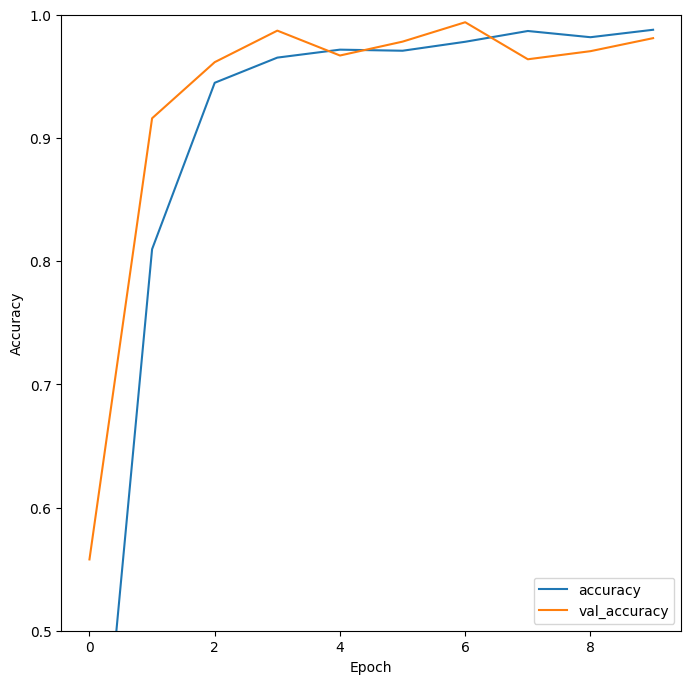

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

In [ ]:
x_tet=tf.image.resize(x_test, (200, 200))
plt.imshow( x_tet[5])

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:

pred=model.predict(x_test[4].reshape(1,32,32,3))
predicted_class = np.argmax(pred)
print(predicted_class)

1/1 [==============================] - 0s 24ms/step
20
